# Kapittel 15

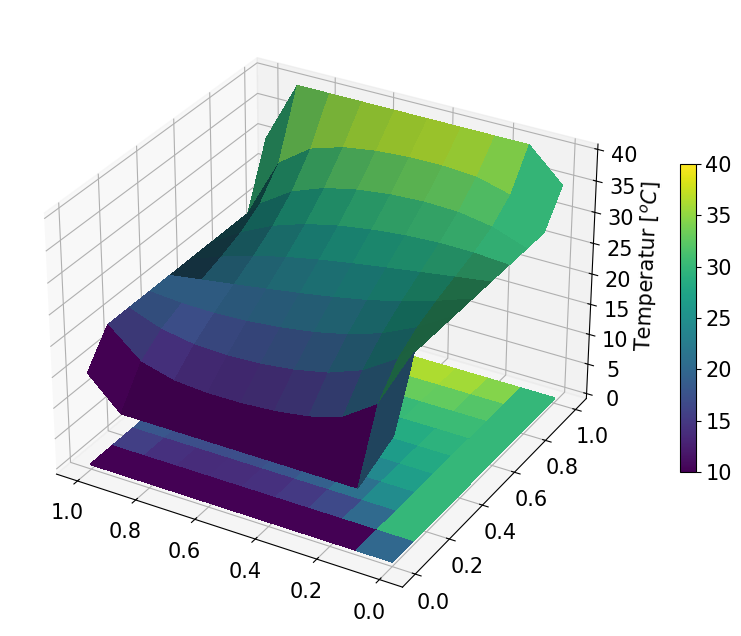

In [130]:
# Temperaturfordeling.m

import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colors
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D

# Skript som estimerer temperaturfordelinga på ei
# kvadratisk metallplate der temperaturane på
# sidekantane er fikserte. Dette gjer den ved å
# iterere på temperaturfordelingsmatrisa ved å setje
# verdien i kvart element til gjennomsnittet av
# nabopunkta. Dette blir gjentatt til dess matrisa
# blir praktisk tala uendra ved nye iterasjonar.

# Fikserer kanttemperaturar
TkantVenstre = 10
TkantOver = 30
TkantHoegre = 40
TkantUnder = 20

# Bestemmer feilmarginen gitt ved normen til matrisa.
Tol = 1e-2

# Bestemmer inndelinga (blir lest inn frå kommandolinja)
#N=input('Kor fin oppdeling vil du ha? ')
N = 10

#
# Set opp startmatrisa
#
# Allokerer temperaturmatrisa Tmat og kopi
Tmat = np.zeros((N, N))
TmatGml = Tmat.copy()

# Startfordeling med tilfeldige tal frå max til min
Min = np.min(np.array([TkantVenstre, TkantOver, TkantHoegre, TkantUnder]))
Max = np.max(np.array([TkantVenstre, TkantOver, TkantHoegre, TkantUnder]))
Tmat[1:(N-1),1:(N-1)] = np.ones((N-2,N-2))*Min+(Max-Min)*np.random.random((N-2,N-2))

# Kantar
Tmat[1:N-1, 0] = TkantVenstre
Tmat[0, 1:(N-1)] = TkantOver
Tmat[1:(N-1), N-1] = TkantHoegre
Tmat[N-1, 1:(N-1)] = TkantUnder

# Hjørna (gjennomsnitt)
Tmat[0,0] = (TkantVenstre+TkantOver)/2
Tmat[0,N-1] = (TkantOver+TkantHoegre)/2
Tmat[N-1,N-1] = (TkantHoegre+TkantUnder)/2
Tmat[N-1,0] = (TkantUnder+TkantVenstre)/2

# Itererer til det sluttar å endre seg
while np.linalg.norm(Tmat-TmatGml) > Tol:
  TmatGml = Tmat.copy()       # Kopierer matrisa
  for r in range(1, N-1):
    for s in range(1, N-1):
      # Omdefinerer temp. til gjennomsnitt
      Tmat[r,s] = (Tmat[r,s-1] + Tmat[r,s+1] + Tmat[r-1,s] + Tmat[r+1,s])/4

# Plottar sluttfordelinga
Tmat = Tmat.transpose() # FIXME: Quick-fix for å lage det samme plottet (visuelt) som for MATLAB

# Vektor med verdiar på x- og y-aksane
XYvektor = np.arange(0, 1 + 1/(N-1) * 0.9, 1/(N-1))

plt.rcParams.update({'font.size': 15})

# Create the meshgrid
X, Y = np.meshgrid(XYvektor, XYvektor) 

fig = plt.figure(figsize=(14, 8))
ax = fig.add_subplot(projection='3d')
norm = colors.Normalize(vmin=Tmat.min(), vmax=Tmat.max())
cmap = plt.cm.viridis
colors = cmap(norm(Tmat))
#surf = ax.plot_surface(X, Y, Tmat, facecolors=colors, linewidth=0, antialiased=False, shade=True) # FIXME: Rutenett-plott
surf = ax.plot_surface(X, Y, Tmat, linewidth=0, facecolors=colors, antialiased=False, shade=True) # Overflate-plott
pcol = ax.plot_surface(X, Y, np.zeros_like(Tmat), facecolors=colors, shade=False, antialiased=False) # Farge-plott
ax.xaxis.set_inverted(True) # FIXME: Quick-fix for å lage det samme plottet (visuelt) som for MATLAB
ax.set_zlabel('Temperatur [$^o C$]')     # Namn på z-akse

sc = cm.ScalarMappable(cmap=cmap, norm=norm)
fig.colorbar(sc, ax=ax, shrink=0.5)

plt.show()
